In [1]:
# ライブラリーの準備
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sb

# 停留状態の解析用
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# ARモデル用
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# ARIMAモデル用
from statsmodels.tsa.arima_model import ARIMA

## Data Loading

In [2]:
# データセットの読込
main_data = pd.read_csv("rox_data_set.csv")
sub_data = pd.read_csv("rox_other_variables.csv")

### データセットの確認

In [3]:
# main_dataの確認
main_data.head()

,Date,time0_1,time1_2,time2_3,time3_4,time4_5,time5_6,time6_7,time7_8,time8_9,...,time13_14,time14_15,time14_16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,05:00～05:59,08:00～08:59,09:00～09:59,10:00～10:59,11:00～11:59,12:00～12:59,13:00～13:59,14:00～14:59,15:00～15:59,...,20:00～20:59,21:00～21:59,22:00～22:59,NaN,"©︎ROX inc, 本資料を第三者に転送、公開することを禁じます",NaN,NaN,NaN,NaN,NaN
1,12/1/2017,0,24,42,52,58,84,62,66,48,...,72,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/2/2017,0,28,44,72,100,126,96,100,110,...,46,20,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/3/2017,0,14,46,64,100,92,98,112,122,...,42,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/4/2017,0,18,46,52,66,70,78,76,70,...,38,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* 0行目と18列目以降が不要

In [4]:
main_data.tail()

,Date,time0_1,time1_2,time2_3,time3_4,time4_5,time5_6,time6_7,time7_8,time8_9,...,time13_14,time14_15,time14_16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
787,1/26/2020,0,10,40,38,66,100,96,110,98,...,34,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,1/27/2020,0,8,22,54,64,88,42,70,60,...,34,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1/28/2020,0,12,42,42,32,36,54,16,42,...,16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,1/29/2020,0,8,28,28,60,56,46,76,58,...,58,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,1/30/2020,0,24,30,32,74,58,62,38,52,...,48,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* 最終行は問題無し。

In [17]:
# sub_dataの確認
sub_data.head()

,Date,気温,降水量,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,12/1/2017,8.5,0.0,NaN,"©︎ROX inc, 本資料を第三者に転送、公開することを禁じます",NaN,NaN,NaN,NaN,NaN
1,12/2/2017,7.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/3/2017,8.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/4/2017,8.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/5/2017,9.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
sub_data.tail()

,Date,気温,降水量,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
787,1/27/2020,5.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,1/28/2020,4.4,55.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1/29/2020,11.8,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,1/30/2020,11.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,1/31/2020,8.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* 4列目以降は不要

### データセットの加工

In [4]:
# main_dataの0行目と18列目以降の削除
clean_main_data = main_data.drop(index=main_data.index[[0]], columns=main_data.columns[[17, 18, 19, 20, 21, 22, 23]])
clean_main_data

,Date,time0_1,time1_2,time2_3,time3_4,time4_5,time5_6,time6_7,time7_8,time8_9,time9_10,time10_11,time11_12,time12_13,time13_14,time14_15,time14_16
1,12/1/2017,0,24,42,52,58,84,62,66,48,68,76,90,76,72,8,0
2,12/2/2017,0,28,44,72,100,126,96,100,110,94,90,82,78,46,20,4
3,12/3/2017,0,14,46,64,100,92,98,112,122,136,90,64,54,42,10,0
4,12/4/2017,0,18,46,52,66,70,78,76,70,48,62,84,72,38,30,0
5,12/5/2017,0,16,56,64,64,80,58,72,60,68,66,60,78,40,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,1/26/2020,0,10,40,38,66,100,96,110,98,146,86,50,46,34,12,0
788,1/27/2020,0,8,22,54,64,88,42,70,60,52,66,50,58,34,4,0
789,1/28/2020,0,12,42,42,32,36,54,16,42,54,26,44,36,16,0,0
790,1/29/2020,0,8,28,28,60,56,46,76,58,70,82,62,90,58,4,0


In [6]:
# sub_dataの4列目以降の削除
clean_sub_data = sub_data.drop(columns=sub_data.columns[[3, 4, 5, 6, 7, 8, 9]])
clean_sub_data

,Date,気温,降水量
0,12/1/2017,8.5,0.0
1,12/2/2017,7.6,0.0
2,12/3/2017,8.2,0.0
3,12/4/2017,8.8,0.0
4,12/5/2017,9.2,0.0
...,...,...,...
787,1/27/2020,5.1,5.0
788,1/28/2020,4.4,55.5
789,1/29/2020,11.8,28.0
790,1/30/2020,11.7,0.0


### 欠損値の確認

In [216]:
print(clean_main_data.isnull().any())
print()
print(clean_sub_data.isnull().any())

time0_1      False
time1_2      False
time2_3      False
time3_4      False
time4_5      False
time5_6      False
time6_7      False
time7_8      False
time8_9      False
time9_10     False
time10_11    False
time11_12    False
time12_13    False
time13_14    False
time14_15    False
time14_16    False
dtype: bool

Date    False
気温      False
降水量     False
dtype: bool


* 欠損値は無し

### dtypeの確認

In [7]:
print(clean_main_data.dtypes)
print()
print(clean_sub_data.dtypes)

Date         object
time0_1      object
time1_2      object
time2_3      object
time3_4      object
time4_5      object
time5_6      object
time6_7      object
time7_8      object
time8_9      object
time9_10     object
time10_11    object
time11_12    object
time12_13    object
time13_14    object
time14_15    object
time14_16    object
dtype: object

Date     object
気温      float64
降水量     float64
dtype: object


### dtypeをobjectからint64への変換

In [8]:
# Date列をdatetime64型に変換
clean_main_data['Date'] = pd.to_datetime(clean_main_data['Date'])

In [9]:
# time0_1列以降をint型に変換
clean_main_data.iloc[:, 1:17] = clean_main_data.iloc[:, 1:17].astype('int64')

In [10]:
# 再度dtypesを確認
clean_main_data.dtypes

Date         datetime64[ns]
time0_1               int64
time1_2               int64
time2_3               int64
time3_4               int64
time4_5               int64
time5_6               int64
time6_7               int64
time7_8               int64
time8_9               int64
time9_10              int64
time10_11             int64
time11_12             int64
time12_13             int64
time13_14             int64
time14_15             int64
time14_16             int64
dtype: object

### Date列をindex化

In [11]:
clean_main_data.set_index('Date', inplace = True)

In [12]:
# データフレームの確認
clean_main_data.head()

,time0_1,time1_2,time2_3,time3_4,time4_5,time5_6,time6_7,time7_8,time8_9,time9_10,time10_11,time11_12,time12_13,time13_14,time14_15,time14_16
Date,,,,,,,,,,,,,,,,
2017-12-01,0,24,42,52,58,84,62,66,48,68,76,90,76,72,8,0
2017-12-02,0,28,44,72,100,126,96,100,110,94,90,82,78,46,20,4
2017-12-03,0,14,46,64,100,92,98,112,122,136,90,64,54,42,10,0
2017-12-04,0,18,46,52,66,70,78,76,70,48,62,84,72,38,30,0
2017-12-05,0,16,56,64,64,80,58,72,60,68,66,60,78,40,8,0


## Data Visualization

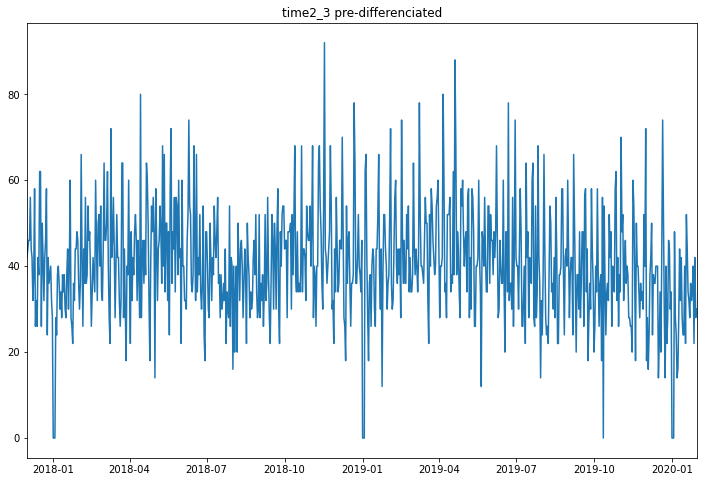

In [14]:
# time2_3の描画

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(clean_main_data.iloc[:, 2:3])
ax.margins(x=0.0)
ax.set(title='time2_3 pre-differenciated')
plt.show()

## Stationary check and Differencing

1. データの変動が停留 (Stationary)しているかを調べる。
2. Stationaryでなければ、差異（Differencing）を行う。

In [15]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(X):
    result=adfuller(X)
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observation Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, times series has a unit root, indicating it is non-stationary.")
        

In [16]:
adfuller_test(clean_main_data.iloc[:, 2:3])

ADF Test Statistic : -3.123787547272849
p-value : 0.024842158053699666
# Lags Used : 20
Number of Observation Used : 770
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


* p-valueが0.05以下のため、充分停留していると思われる。

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

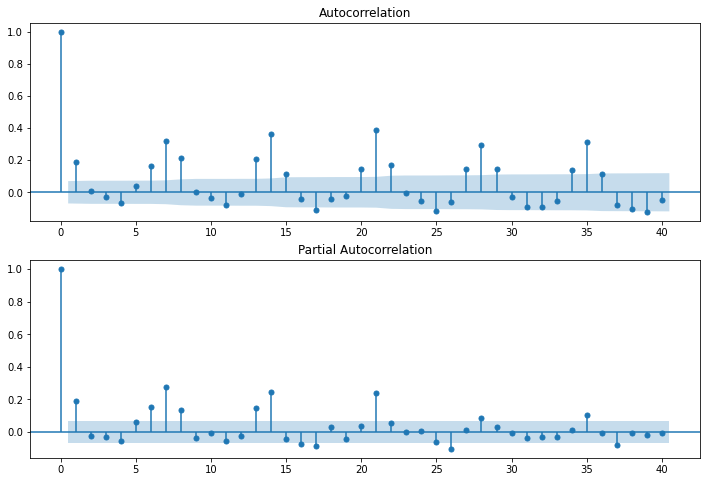

In [18]:
# acf, pacfの確認

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(clean_main_data.iloc[:, 2:3], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(clean_main_data.iloc[:, 2:3], lags=40, ax=ax2)

### Differencingする場合

* 既にデータは停留しているが、ここでさらに差異処理を行う場合

In [19]:
# Converting series to stationary
# Integrated of order 1, dennoted by d (for diff), one of the parameter of ARIMA model.
customer_diff = clean_main_data.diff(periods=1)

In [20]:
# 1行目のNaNを削除
customer_diff = customer_diff[1:]
customer_diff.head()

,time0_1,time1_2,time2_3,time3_4,time4_5,time5_6,time6_7,time7_8,time8_9,time9_10,time10_11,time11_12,time12_13,time13_14,time14_15,time14_16
Date,,,,,,,,,,,,,,,,
2017-12-02,0.0,4.0,2.0,20.0,42.0,42.0,34.0,34.0,62.0,26.0,14.0,-8.0,2.0,-26.0,12.0,4.0
2017-12-03,0.0,-14.0,2.0,-8.0,0.0,-34.0,2.0,12.0,12.0,42.0,0.0,-18.0,-24.0,-4.0,-10.0,-4.0
2017-12-04,0.0,4.0,0.0,-12.0,-34.0,-22.0,-20.0,-36.0,-52.0,-88.0,-28.0,20.0,18.0,-4.0,20.0,0.0
2017-12-05,0.0,-2.0,10.0,12.0,-2.0,10.0,-20.0,-4.0,-10.0,20.0,4.0,-24.0,6.0,2.0,-22.0,0.0
2017-12-06,0.0,6.0,-12.0,-20.0,12.0,16.0,24.0,8.0,18.0,2.0,16.0,32.0,-12.0,16.0,-8.0,0.0


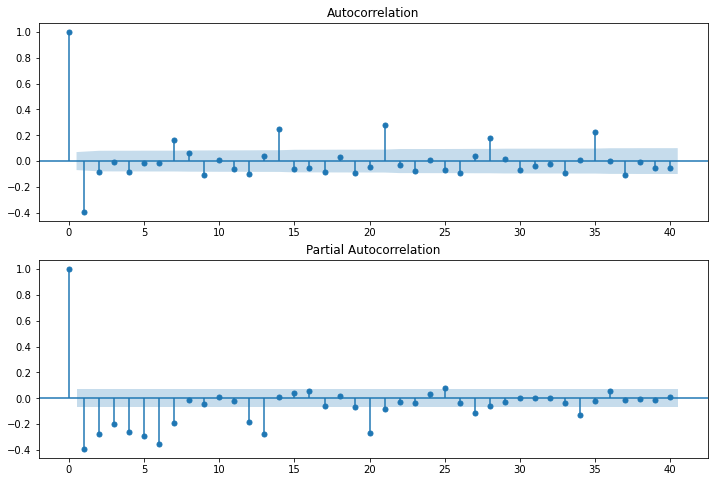

In [21]:
# 再度確認

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(customer_diff.iloc[:, 2:3], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(customer_diff.iloc[:, 2:3], lags=40, ax=ax2)

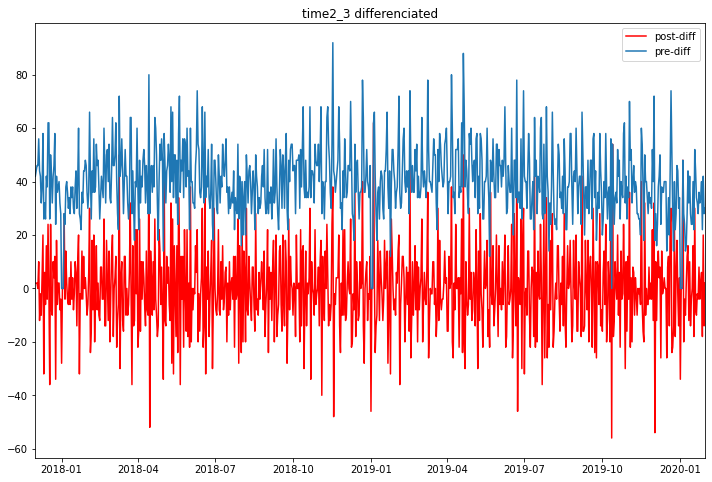

In [29]:
# time2_3の停留処理後の描画

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(customer_diff.iloc[:, 2:3], color='red', label='post-diff')
ax.plot(clean_main_data.iloc[:, 2:3], label='pre-diff')
ax.legend(loc='best')
ax.margins(x=0.0)
ax.set(title='time2_3 differenciated')
plt.show()

In [25]:
adfuller_test(customer_diff.iloc[:, 2:3])

ADF Test Statistic : -11.10686988787873
p-value : 3.743789924041558e-20
# Lags Used : 20
Number of Observation Used : 769
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


* p-valueをさらに下げることができた。

## Splitting into train and test

In [26]:
# time2_3内のデータを確認

# X = clean_main_data.iloc[:, 2:3].values
X = customer_diff.iloc[:, 2:3].values
X.size

790

In [27]:
train = X[0:699] # 699 data as train data
test = X[699:] # 91 data as test data

## AR model（参考）

In [53]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [54]:
predictions = model_ar_fit.predict(start=699, end=790)

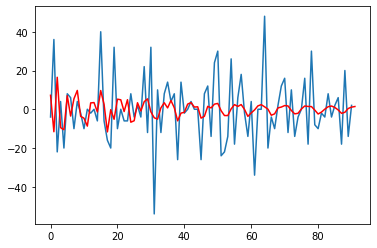

In [55]:
plt.plot(test)
plt.plot(predictions, color='red')

## ARIMA model

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
# 全パラメータのリスト化
# p = periods taken for autoregressive model
# d = Integrated order, how many time the difference is done. (e.g. 1 or 2)
# q = periods in moving average

import itertools
p=d=q=range(0, 10)
pdq = list(itertools.product(p, d, q))

In [39]:
# 最適パラメーター（p, d, q）の検索

import warnings
warnings.filterwarnings('ignore')

better_aic = 10000

for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        new_aic = model_arima_fit.aic
        
        if new_aic < better_aic:
            better_aic = new_aic
            print(param, better_aic)
        else:
            pass
    except:
        continue

(0, 0, 0) 5928.932163645585
(0, 0, 1) 5551.981400657548
(0, 0, 2) 5544.408913997688
(0, 0, 3) 5541.147722025723
(0, 0, 4) 5537.99825534154
(0, 0, 5) 5527.848181717102
(0, 0, 8) 5514.759744122517
(0, 0, 9) 5500.551997190882
(2, 0, 3) 5431.508437011733
(2, 0, 5) 5428.523595502238
(2, 0, 6) 5409.0595602924395
(4, 0, 6) 5408.344743999802
(4, 0, 8) 5407.131706078078
(5, 0, 7) 5390.602454551111
(5, 0, 8) 5385.870871828198
(5, 0, 9) 5375.340509940945
(6, 0, 8) 5366.940628895737
(9, 0, 7) 5360.9788719939


In [40]:
# 最適パラメータの適用

model_arima = ARIMA(train, order=(9, 0, 7))
model_arima_fit = model_arima.fit()
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  699
Model:                     ARMA(9, 7)   Log Likelihood               -2662.489
Method:                       css-mle   S.D. of innovations             10.776
Date:                Tue, 24 Nov 2020   AIC                           5360.979
Time:                        15:52:48   BIC                           5442.873
Sample:                             0   HQIC                          5392.638
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.027     -0.071      0.944      -0.054       0.050
ar.L1.y       -1.0204      0.044    -22.980      0.000      -1.107      -0.933
ar.L2.y       -1.0216      0.066    -15.403      0.000      -1.152      -0.892
ar.L3.y       -1.0168      0.087    -11.740      0.000      -1.187      -0.847
ar.L4.y       -0.9897      0.087    -11.349      0.000      -1.161      -0.819
ar.L5.y       -1.0062      0.086    -11.641      0.000      -1.176      -0.837
ar.L6.y       -0.9962      0.086    -11.541      0.000      -1.165      -0.827
ar.L7.y       -0.0050      0.086     -0.058      0.954      -0.173       0.163
ar.L8.y        0.0137      0.067      0.204      0.838      -0.118       0.145
ar.L9.y        0.0261      0.044      0.596      0.551      -0.060       0.112
ma.L1.y        0.0891      0.025      3.512      0.000       0.039       0.139
ma.L2.y        0.0330      0.028      1.168      0.243      -0.022       0.088
ma.L3.y        0.0892      0.028      3.151      0.002       0.034       0.145
ma.L4.y       -0.0158      0.027     -0.596      0.551      -0.068       0.036
ma.L5.y        0.0780      0.023      3.412      0.001       0.033       0.123
ma.L6.y        0.0793      0.025      3.152      0.002       0.030       0.129
ma.L7.y       -0.9028      0.027    -33.046      0.000      -0.956      -0.849
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9080           -0.4252j            1.0027           -0.4303
AR.2           -0.9080           +0.4252j            1.0027            0.4303
AR.3           -0.2205           -0.9757j            1.0003           -0.2854
AR.4           -0.2205           +0.9757j            1.0003            0.2854
AR.5            0.6238           -0.7829j            1.0011           -0.1429
AR.6            0.6238           +0.7829j            1.0011            0.1429
AR.7           -1.5591           -2.8484j            3.2472           -0.3297
AR.8           -1.5591           +2.8484j            3.2472            0.3297
AR.9            3.6037           -0.0000j            3.6037           -0.0000
MA.1           -0.9101           -0.4144j            1.0000           -0.4320
MA.2           -0.9101           +0.4144j            1.0000            0.4320
MA.3           -0.2149           -0.9771j            1.0004           -0.2845
MA.4           -0.2149           +0.9771j            1.0004            0.2845
MA.5            0.6340           -0.7952j            1.0169           -0.1429
MA.6            0.6340           +0.7952j            1.0169            0.1429
MA.7            1.0700           -0.0000j            1.0700           -0.0000
-----------------------------------------------------------------------------
"""

In [109]:
# 2019-11-01から2020-01-30までのforecast結果
arima_predictions = model_arima_fit.forecast(steps=91)[0]
arima_predictions

array([  0.25942037,  13.01115668,  -4.74103792, -10.54396051,
        -8.53083889,  11.87030529,  -5.41414553,   4.04784998,
        13.34512105,  -4.71277425, -10.71275553,  -8.44647498,
        12.00402661,  -5.5702762 ,   4.26133695,  12.8045171 ,
        -4.16620995, -10.9894106 ,  -8.36224168,  12.116804  ,
        -5.69496611,   4.45043713,  12.27628461,  -3.61887792,
       -11.27981277,  -8.25192203,  12.19448306,  -5.78587106,
         4.61490605,  11.76203586,  -3.07329186, -11.58138163,
        -8.11759045,  12.23830116,  -5.84316994,   4.75380443,
        11.26366468,  -2.53192274, -11.89158183,  -7.96137854,
        12.2496377 ,  -5.86723128,   4.86639141,  10.78289433,
        -1.99712998, -12.20790949,  -7.78547261,  12.23000206,
        -5.85860341,   4.95212142,  10.32127357,  -1.47115161,
       -12.527906  ,  -7.59209845,  12.18101981,  -5.81800479,
         5.01064038,   9.88017398,  -0.95609553, -12.84917111,
        -7.38350643,  12.10441876,  -5.74631358,   5.04

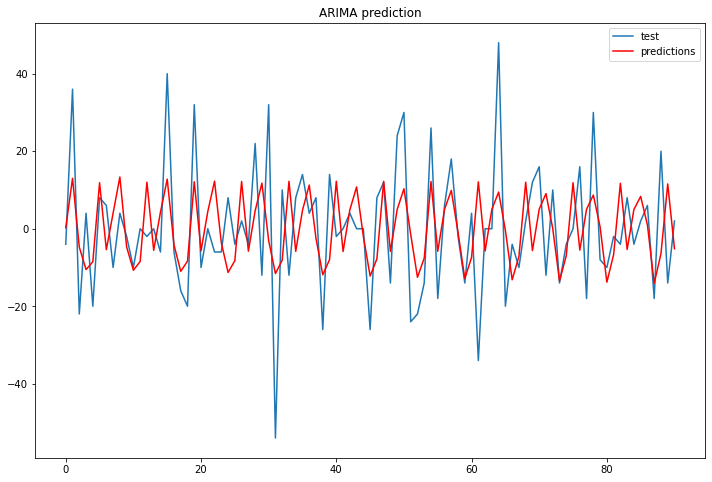

In [108]:
# forecast結果との答え合わせを可視化

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(test, label="test")
ax.plot(arima_predictions, color='red', label="predictions")
# ax.margins(x=0.0)
ax.legend(loc='best')
ax.set(title='ARIMA prediction')
plt.show()

In [42]:
# 平均二乗誤差の算出
mean_squared_error(test, predictions)

240.0273848634683

## SARIMAX model

* 上記ARIMAモデルのp, q, dのパラメータを引用
* seasonal値は30で設定

In [43]:
# ARIMAのp, q, dのパラメータを引用
model=sm.tsa.statespace.SARIMAX(train, order=(9, 0, 7), seasonal_order=(9, 0, 7, 30))
results=model.fit()

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  699
Model:             SARIMAX(9, 0, 7)x(9, 0, 7, 30)   Log Likelihood               -2685.258
Date:                            Tue, 24 Nov 2020   AIC                           5436.516
Time:                                    16:52:56   BIC                           5586.655
Sample:                                         0   HQIC                          5494.557
                                            - 699                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4582      0.917     -1.591      0.112      -3.255       0.338
ar.L2         -0.8266      0.832     -0.993      0.321      -2.458       0.805
ar.L3         -0.4227      0.275     -1.536      0.124      -0.962       0.117
ar.L4         -0.9652      0.280     -3.451      0.001      -1.514      -0.417
ar.L5         -1.0752      0.749     -1.435      0.151      -2.544       0.393
ar.L6         -0.3215      0.664     -0.484      0.628      -1.622       0.979
ar.L7          0.2573      0.125      2.058      0.040       0.012       0.502
ar.L8          0.3119      0.174      1.791      0.073      -0.029       0.653
ar.L9          0.1488      0.161      0.926      0.354      -0.166       0.463
ma.L1          0.5039      0.916      0.550      0.582      -1.292       2.300
ma.L2         -0.6078      0.450     -1.352      0.176      -1.489       0.273
ma.L3         -0.3168      0.624     -0.508      0.611      -1.539       0.905
ma.L4          0.5858      0.156      3.755      0.000       0.280       0.892
ma.L5          0.1108      0.503      0.220      0.826      -0.876       1.097
ma.L6         -0.7733      0.353     -2.193      0.028      -1.465      -0.082
ma.L7         -0.4970      0.730     -0.681      0.496      -1.927       0.933
ar.S.L30       0.3240      1.796      0.180      0.857      -3.196       3.845
ar.S.L60      -0.1553      0.654     -0.237      0.812      -1.437       1.127
ar.S.L90      -0.1839      0.587     -0.313      0.754      -1.335       0.968
ar.S.L120      0.2204      0.669      0.330      0.742      -1.090       1.531
ar.S.L150     -0.0133      0.631     -0.021      0.983      -1.250       1.223
ar.S.L180     -0.4443      0.589     -0.754      0.451      -1.599       0.711
ar.S.L210      0.4431      1.075      0.412      0.680      -1.664       2.550
ar.S.L240     -0.1531      0.274     -0.559      0.576      -0.690       0.384
ar.S.L270      0.0062      0.285      0.022      0.983      -0.552       0.564
ma.S.L30      -0.3037      1.800     -0.169      0.866      -3.831       3.223
ma.S.L60       0.1449      0.657      0.221      0.825      -1.143       1.433
ma.S.L90       0.1807      0.593      0.305      0.761      -0.981       1.343
ma.S.L120     -0.2667      0.686     -0.389      0.697      -1.611       1.077
ma.S.L150      0.0330      0.680      0.049      0.961      -1.299       1.365
ma.S.L180      0.4150      0.623      0.666      0.505      -0.806       1.636
ma.S.L210     -0.3046      1.047     -0.291      0.771      -2.356       1.747
sigma2       127.8028      9.027     14.158      0.000     110.110     145.495
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                32.14
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):              

In [110]:
# 2019-11-01から2020-01-30までのforecast結果
sarimax_pred = results.forecast(steps=91)
sarimax_pred

array([  6.49613662,   4.64989033,   0.86801921, -16.70587986,
         3.35764397,  -3.61658706,   3.49931153,   8.71537325,
         5.58608171,  -3.97350256,  -8.59380916,  -3.11773544,
        -1.84781503,  10.1145661 ,  -2.10600068,  11.20775078,
        -0.18411676, -14.2093869 ,  -3.50903256,   3.16883041,
        -2.06319942,   5.68890931,   7.57853418,  -5.06365996,
        -3.7481317 ,  -5.25703983,  -1.53873109,   4.03392391,
         8.640737  ,   0.21941149,   3.07915514, -10.05115854,
        -6.59654502,   1.68453731,   0.97974198,  10.85192652,
         0.99719695,  -2.33509332,  -7.70516827,  -2.58815202,
         2.28865451,  -1.39558251,   7.24381495,   5.34917639,
         0.79946282, -13.69730621,  -3.70467489,   6.27431652,
        -1.82280885,   5.68927473,  10.58105152,  -3.45626136,
        -9.95515947,  -2.95196811,   1.91852338,   0.55163221,
         3.32678411,   8.01383632,  -4.5250774 ,  -2.23269142,
        -7.71617981,  -1.17211968,   3.35315362,   7.55

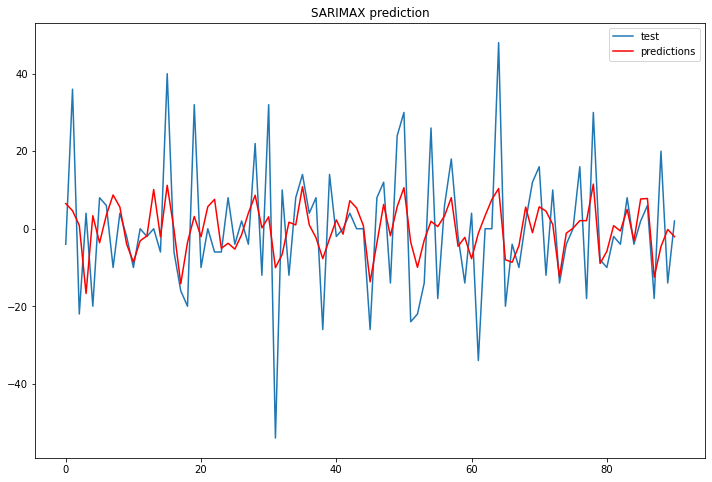

In [111]:
# forecast結果との答え合わせを可視化
# sarimax_pred = results.predict(start=700, end=790, dynamic=True)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(test, label="test")
ax.plot(sarimax_pred, color='red', label="predictions")
# ax.margins(x=0.0)
ax.legend(loc='best')
ax.set(title='SARIMAX prediction')
plt.show()

In [104]:
# 平均二乗誤差の算出
mean_squared_error(test, sarimax_pred)

203.821691989505